## A Seperate Handbook is provided with detailed discription of the Code

#### The following line is one time code for installing pandas_datareader

In [1]:
#pip install pandas_datareader


In [2]:
# This code will filter out all the warnings
import warnings
warnings.filterwarnings('ignore')

### Import the Necessary Libraries

In [3]:
import pandas_datareader as web
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import date


### Import data using pandas_datareader. Select data range of your choice

In [4]:
df=web.DataReader('MSFT',data_source='yahoo',start='2012-01-01',end='2020-10-18')

## Basic EDA

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.906679
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.422224
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.651352
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.003237
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.700455


In [6]:
df.shape

(2213, 6)

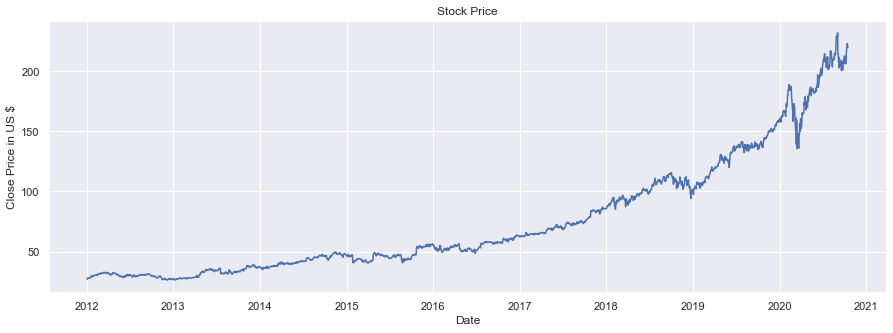

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df.Close)
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price in US $");


## Seperate out the Close Column as we will be working on the Closing Values

In [8]:
close=df.filter(['Close'])

In [9]:
close.head()

,Close
Date,
2012-01-03,26.770000
2012-01-04,27.400000
2012-01-05,27.680000
2012-01-06,28.110001
2012-01-09,27.740000


In [10]:
# change the Values to Numpy Array
close_stock=close.values

In [11]:
type(close_stock)

numpy.ndarray

## Prepare & Scale  the Training Data

In [12]:
training_data_length=math.ceil(len(close_stock)*0.8)

In [13]:
training_data_length

1771

In [14]:
mms=MinMaxScaler(feature_range=(0, 1))

In [15]:
scaled_close_stock=mms.fit_transform(close_stock)

In [16]:
scaled_close_stock

array([[0.00194856],
       [0.00501753],
       [0.00638153],
       ...,
       [0.94743768],
       [0.94159202],
       [0.94159202]])

In [17]:
training_data=scaled_close_stock[0:training_data_length,:]

In [18]:
len(training_data)

1771

In [19]:
training_data

array([[0.00194856],
       [0.00501753],
       [0.00638153],
       ...,
       [0.36866721],
       [0.38308654],
       [0.38488893]])

### Make X_train & y_train

In [20]:
X_train=[]
y_train=[]

In [21]:
for i in range(60 ,len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

In [22]:
type(X_train)

list

### Change X_train and y_train to NumPy arrays

In [23]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [24]:
print(type(X_train))
print(type(y_train))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [25]:
print(X_train.ndim)
print(X_train.shape)

2
(1711, 60)


In [26]:
X_train.shape[1]

60

### RNN needs data in 3 dimensions , number of Samples, Number of Time Steps and Number of Features So wee need to reshape the data

In [27]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# Make the LSTM Architecture

In [28]:
import tensorflow


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model = Sequential()

In [31]:
X_train.shape


(1711, 60, 1)

### input_shape = number of time steps and number of features. In this case number of features is 1

In [32]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

In [33]:
model.add(LSTM(units = 50, return_sequences = True))



model.add(LSTM(units = 50, return_sequences = True))



model.add(LSTM(units = 50))


In [34]:
# Adding the output layer
model.add(Dense(units = 1))

In [35]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
54/54 [==============================] - 4s 79ms/step - loss: 0.0033
Epoch 2/50
54/54 [==============================] - 4s 66ms/step - loss: 1.2378e-04
Epoch 3/50
54/54 [==============================] - 4s 67ms/step - loss: 1.2249e-04
Epoch 4/50
54/54 [==============================] - 4s 66ms/step - loss: 1.5490e-04
Epoch 5/50
54/54 [==============================] - 4s 66ms/step - loss: 1.1612e-04
Epoch 6/50
54/54 [==============================] - 4s 72ms/step - loss: 1.3402e-04
Epoch 7/50
54/54 [==============================] - 4s 69ms/step - loss: 1.1836e-04
Epoch 8/50
54/54 [==============================] - 4s 67ms/step - loss: 1.1701e-04
Epoch 9/50
54/54 [==============================] - 4s 67ms/step - loss: 1.3035e-04
Epoch 10/50
54/54 [==============================] - 4s 67ms/step - loss: 1.1096e-04
Epoch 11/50
54/54 [==============================] - 4s 68ms/step - loss: 1.3896e-04
Epoch 12/50
54/54 [==============================] - 4s 68ms/step - loss: 1.36

## Prepare & reshape the Test Data

In [37]:
test_data=scaled_close_stock[training_data_length-60:,:]


In [38]:
training_data_length

1771

In [39]:
len(test_data)

502

In [40]:
X_test=[]
y_test=close_stock[training_data_length:,:]

In [41]:
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [42]:
len(X_test)

442

In [43]:
X_test=np.array(X_test)

In [44]:
X_test.shape

(442, 60)

In [45]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Make Predictions

In [46]:
y_pred=model.predict(X_test)


In [47]:
y_pred

array([[0.3780632 ],
       [0.38059056],
       [0.38449308],
       [0.38718203],
       [0.3885117 ],
       [0.38852948],
       [0.38843885],
       [0.3872886 ],
       [0.38392583],
       [0.3818574 ],
       [0.38086438],
       [0.37942728],
       [0.379552  ],
       [0.38239324],
       [0.38593006],
       [0.38808608],
       [0.38874686],
       [0.388178  ],
       [0.38815233],
       [0.38893893],
       [0.3901212 ],
       [0.3920704 ],
       [0.39424255],
       [0.3952804 ],
       [0.39658526],
       [0.39939585],
       [0.40335688],
       [0.40764377],
       [0.41096503],
       [0.41264066],
       [0.41323102],
       [0.4130928 ],
       [0.41226253],
       [0.41125146],
       [0.40958622],
       [0.40785703],
       [0.40835285],
       [0.4113994 ],
       [0.41610205],
       [0.42075536],
       [0.42502424],
       [0.42944562],
       [0.4333394 ],
       [0.43583086],
       [0.438727  ],
       [0.43952337],
       [0.43859676],
       [0.437

In [48]:
y_pred=mms.inverse_transform(y_pred)

In [49]:
pd.DataFrame(y_pred)

,0
0,103.978806
1,104.497627
2,105.298737
3,105.850723
4,106.123680
...,...
437,183.509491
438,186.256439
439,188.578629
440,189.237183


## Plot the Data

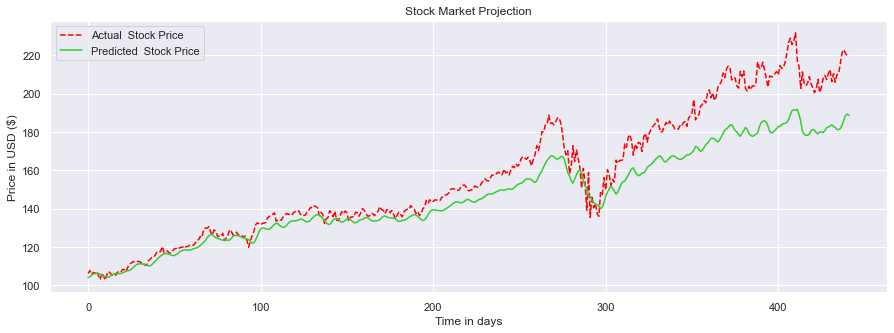

In [50]:
# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Actual  Stock Price',ls='--')
plt.plot(y_pred, color = 'limegreen', label = 'Predicted  Stock Price',ls='-')
plt.title('Stock Market Projection')
plt.xlabel('Time in days')
plt.ylabel('Price in USD ($)')
plt.legend()
plt.show()

## Plot the whole Data Training, Testing and Prediction Data together

In [51]:
train=close[:training_data_length]
test=close[training_data_length:]
test['pred']=y_pred

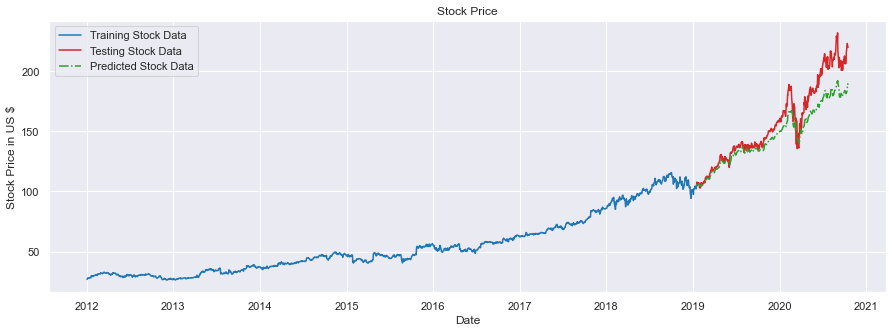

In [53]:
plt.figure(figsize=(15,5))
plt.plot(train['Close'], color = 'tab:blue', label = 'Training Stock Data',ls='-')
plt.plot(test['Close'], color = 'tab:red', label = 'Testing Stock Data',ls='-')
plt.plot(test['pred'], color = 'tab:green', label = 'Predicted Stock Data',ls='dashdot')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price in US $')
plt.legend()
plt.show()